### Text Mining(텍스트 마이닝)
- 데이터로부터 유용한 인사이트를 발굴하는 Data Mining의 한 종류
- 비정형 텍스트 데이터로부터 의미 있는 정보를 추출하는 방법

### NLP(Natural Language Processing, 자연어 처리)
- 사람이 사용하는 언어를 이해하고 예측하는 분야

#### Text Mining 분야
- 문서 분류 : text가 특정 카테고리에 속하는지 예측하는 분야
- 문서 요약 : text의 주요 내용을 추리는 분야
- 문서 군집 분석 : 문서끼리의 유사도를 비교분서하는 분야
- 감성 분석 : text에 들어있는 감정이나 의도를 분석하는 분야

#### Text Mining 프로세스
1. 텍스트 전처리
    - 클렌징(대/소문자, 특수문자나 오탈자 제거 등)
    - 불용어제거(stop words)
    - 어근 추출(Stemming)
        - 영어 : NLTK 도구 활용
        - 한국어 : Konlpy(형태소 분석기)
    - 토큰화 : text를 일정 단위로 분해하는 작업

2. 수치화/피쳐 벡터화 : 토큰화 된 글자를 특정 규칙에 따라 숫자로 변경하여 학습 특성으로 추출하는 작업
    - BOW, TF-IDF(빈도 기반의 수치화)
    - Word Embedding(워드임베딩) ex. word2vec(단어의 의미를 숫자로 표현하는 알고리즘)
  
3. ML/DL 학습, 예측, 평가 / 분석 등

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", delimiter = "\t")

In [3]:
train.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


In [4]:
# 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


In [5]:
test = pd.read_csv("./data/unsmile_valid_v1.0.tsv", delimiter = "\t")

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      3737 non-null   object
 1   여성/가족   3737 non-null   int64 
 2   남성      3737 non-null   int64 
 3   성소수자    3737 non-null   int64 
 4   인종/국적   3737 non-null   int64 
 5   연령      3737 non-null   int64 
 6   지역      3737 non-null   int64 
 7   종교      3737 non-null   int64 
 8   기타 혐오   3737 non-null   int64 
 9   악플/욕설   3737 non-null   int64 
 10  clean   3737 non-null   int64 
 11  개인지칭    3737 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 350.5+ KB


### 단어 빈도 분석
- 워드 카운트 : 단어의 빈도를 분석

In [7]:
text_train = train["문장"]

In [8]:
text_train[3].split(" ") # 토큰화

['홍팍에도',
 '어버이연합인가',
 '보내요',
 '뭐',
 '이런뎃글',
 '있는데',
 '이거',
 '어버이연합측에',
 '신고하면',
 '그쪽에서',
 '고소',
 '가능하냐?']

In [9]:
# 띄어쓰기 기준으로 모든 문장 토큰화 진행
tmp = [doc.split(" ") for doc in text_train]

In [10]:
token_list = []
for s in tmp :
    token_list += s # 리스트 이어붙이기 -> 2D 리스트를 1D 리스트(단어들이 들어간 리스트)로 바꾸기 위함

In [11]:
token_list

['일안하는',
 '시간은',
 '쉬고싶어서',
 '그런게',
 '아닐까',
 '아동성범죄와',
 '페도버는',
 '기록바',
 '끊어져',
 '영원히',
 '고통',
 '받는다.',
 '무슬림',
 '50퍼',
 '근친이다.',
 '10',
 '16까지',
 'IQ',
 '떨어지고',
 '출산',
 '위험은',
 '400%',
 '다.',
 '루나',
 '솔로앨범',
 '나왔을',
 '때부터',
 '머모',
 '기운',
 '있었음',
 'ㅇㅇ',
 'Keep',
 'o',
 '',
 'doin',
 '진짜',
 '띵곡임',
 '꼭',
 '들어보셈"',
 '홍팍에도',
 '어버이연합인가',
 '보내요',
 '뭐',
 '이런뎃글',
 '있는데',
 '이거',
 '어버이연합측에',
 '신고하면',
 '그쪽에서',
 '고소',
 '가능하냐?',
 '아놔',
 '왜',
 '여기',
 '댓들은',
 '다',
 '여자들이',
 '김치녀라고',
 '먼저',
 '불렸다!',
 '여자들은',
 '더',
 '심하게',
 '그런다!',
 '이렇게',
 '2개로',
 '싸우냐..',
 '내가',
 '볼',
 '땐',
 '둘다',
 '나쁜',
 '말',
 '그',
 '이상도',
 '이하도',
 '아닌데',
 '고향가서',
 '피방가면',
 '동네',
 '부럴',
 '친구들이랑은',
 '뭐',
 '거르는',
 '거',
 '없이',
 '이야기하니까',
 '막',
 '말하게',
 '되더라',
 '당연히',
 '키보드를',
 '치거나',
 '그러지는',
 '않는데',
 '말하는게',
 '많이',
 '거칠어지긴',
 '해',
 '반성해야겠네',
 '예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '나이쳐먹고',
 '피시방가는',
 '놈들은',
 '대가리에',


In [12]:
# 토큰 개수 세기
from collections import Counter # 개수 세는 도구

In [13]:
counter = Counter(token_list)

In [14]:
counter.most_common(40) # Top 40개의 빈도수를 가진 단어 출력

[('다', 661),
 ('왜', 518),
 ('진짜', 514),
 ('ㅋㅋ', 401),
 ('존나', 370),
 ('더', 365),
 ('그냥', 357),
 ('ㅋㅋㅋ', 340),
 ('좀', 261),
 ('이', 243),
 ('그', 236),
 ('저', 234),
 ('씨발', 226),
 ('근데', 223),
 ('시발', 219),
 ('ㅋㅋㅋㅋ', 217),
 ('안', 177),
 ('하는', 171),
 ('난', 170),
 ('수', 169),
 ('새끼들', 166),
 ('저런', 165),
 ('또', 154),
 ('무슨', 153),
 ('아니라', 146),
 ('내가', 145),
 ('하고', 145),
 ('', 141),
 ('있는', 140),
 ('전라도', 139),
 ('ㄹㅇ', 138),
 ('너무', 136),
 ('잘', 134),
 ('뭐', 132),
 ('이런', 132),
 ('이기야', 128),
 ('여자', 125),
 ('ㅋ', 125),
 ('ㅋㅋㅋㅋㅋ', 124),
 ('보면', 123)]

##### 혐오 표현 카테고리 중에 1가지를 선택해 단어 빈도 분석 진행!

In [15]:
data_인종_국적_혐오 = train[train["인종/국적"] == 1] # 인종/국적 카테고리에 해당되는 데이터

In [16]:
data_인종_국적_혐오_문장 = data_인종_국적_혐오['문장'] # 해당 카테고리의 텍스트 데이터만 추출

In [17]:
# 단어들만 공백 기준으로 추출
인종_국적_token = [t for doc in data_인종_국적_혐오_문장 for t in doc.split(" ")] # 이중 for문도 가능!
인종_국적_token

['예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '이슬람뺨치내',
 '갓슬람',
 '정희구현',
 '테러',
 'ㅅㅅㅅㅅ미제양키새끼들에게는',
 '테러가',
 '답이다좆같은',
 '양키',
 '씨발새끼들',
 '진짜',
 '저것들',
 '아주',
 '싫다,',
 '싫어.',
 '내가',
 '외국년놈들에게',
 '욕질',
 '괜히',
 '해대는',
 '게',
 '아니다.',
 '이런',
 '기사',
 '한국에서도',
 '곧나오겠노',
 '개슬람',
 '난민',
 '많아지더만',
 'ㅋㅋ',
 '다문화',
 '극혐',
 '맞고',
 '다인종도',
 '위험하긴',
 '한데어차피',
 '일베서',
 '아무리',
 '극혐씹극혐',
 '소리',
 '해봤자',
 '변하는거',
 '없음',
 '뭐',
 '존나',
 '뭉쳐서',
 '시위해야',
 '윗대가리들이',
 '들을랑말랑하는데',
 '우리',
 '일베충들이',
 '그럴',
 '위인들이',
 '얼마나',
 '있을까?그냥',
 '글러먹었다',
 '생각하고',
 '자기살길이나',
 '찾으면',
 '된다',
 '백인은',
 '애를',
 '안낳으니',
 '기독교가',
 '줄은거고',
 '이슬람은',
 '애를',
 '많이',
 '낳고',
 '불법이민',
 '존나가니',
 '늘어나고',
 '조선족',
 '개새끼들',
 '백린탄으로',
 '멸해야한다',
 '다문화는',
 '그종족의',
 '문화를',
 '존중하고',
 '지속시키며',
 '같이',
 '행복하게',
 '사는건대',
 '이나라는',
 '걍',
 '짬뽕이네',
 '시부랄거',
 '개소리하노',
 '시발라마',
 '조선족이',
 '중국인인데',
 '중국인보다라니',
 '뭔',
 '개소리야',
 '조선족',
 '==',
 '중국인',
 '동일'

In [18]:
# Counter 활용!
counter = Counter(인종_국적_token)

In [19]:
counter.most_common(50)

[('다', 94),
 ('존나', 85),
 ('진짜', 72),
 ('조선족', 68),
 ('왜', 68),
 ('새끼들', 62),
 ('더', 53),
 ('시발', 49),
 ('ㅋㅋ', 47),
 ('씨발', 47),
 ('ㅋㅋㅋ', 46),
 ('그냥', 43),
 ('중국', 41),
 ('이슬람', 38),
 ('개슬람', 37),
 ('짱깨', 37),
 ('그', 34),
 ('좀', 34),
 ('좆족', 34),
 ('ㅋㅋㅋㅋ', 33),
 ('난민', 32),
 ('무슬림', 30),
 ('근데', 28),
 ('똥남아', 28),
 ('저', 27),
 ('다문화', 25),
 ('하는', 25),
 ('ㄹㅇ', 25),
 ('동남아', 24),
 ('걍', 23),
 ('나라', 23),
 ('새끼들이', 23),
 ('뭐', 22),
 ('아니라', 22),
 ('=', 22),
 ('이', 22),
 ('새끼들은', 22),
 ('제발', 22),
 ('무슨', 21),
 ('한국에', 21),
 ('있는', 20),
 ('지들', 20),
 ('저런', 20),
 ('한국', 19),
 ('잘', 19),
 ('다문화는', 18),
 ('ㅋ', 18),
 ('탈북자', 18),
 ('여자', 18),
 ('안', 17)]

### 워드클라우드

In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud # 워드클라우드 클래스

In [22]:
# 객체 생성
wc = WordCloud(
    background_color = "white", # 배경색 설정
    font_path = "C:\\Windows\\Fonts\\malgun.ttf", # 한글이 지원되는 폰트 설정
    random_state = 2024 # 매번 그려지는 단어들이 고정적이게끔 난수 고정
)

In [23]:
# 워드클라우드 생성
input_str = " ".join(인종_국적_token) # 워드클라우드에 들어가는 인자값은 문자열로 받기 때문에, 하나의 문자열로 이어줌!
result_cloud = wc.generate_from_text(input_str) # 워드클라우드 객체에 문자열을 넣어 워드클라우드 생성!

In [24]:
import matplotlib.pyplot as plt

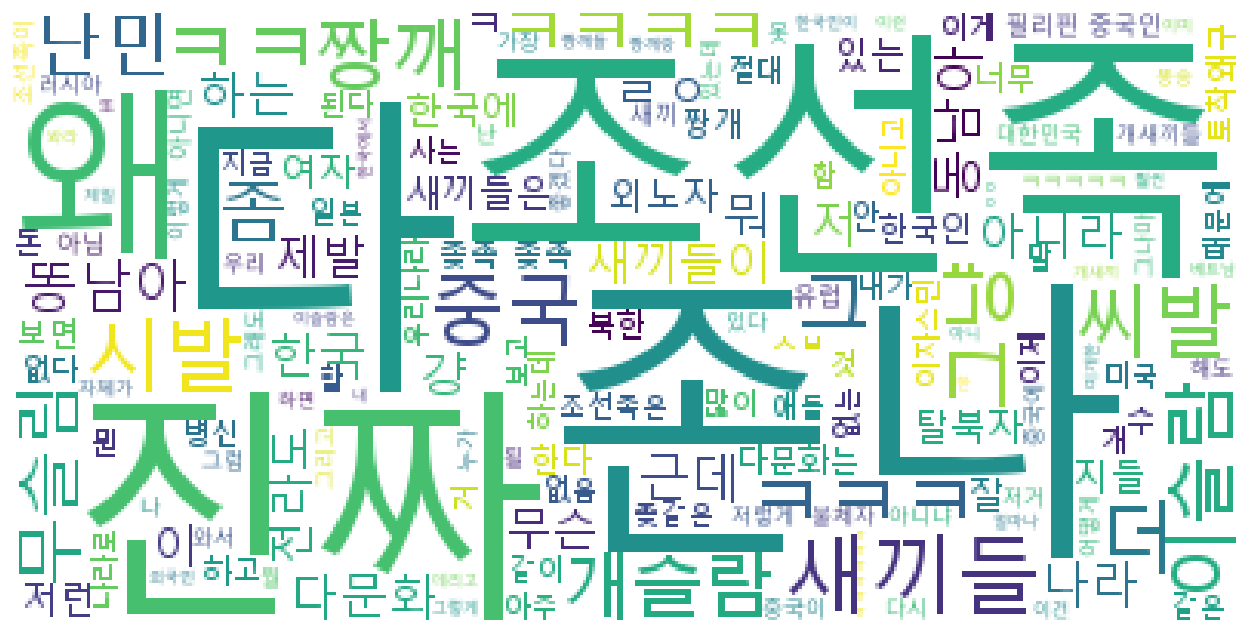

In [25]:
plt.figure(figsize = (20, 8))
plt.imshow(result_cloud) # 이미지 그리기
plt.axis("off") # 축 끄기
plt.savefig("./data/word_cloud.png")
plt.show()

### 데이터 클랜징
- 한 글자 단어 삭제 -> 텍스트 마이닝에서 의미 부여가 어려움
- ㅋㅋㅋ, ㅎㅎㅎ -> 반복적인 글자 삭제

In [26]:
# 정규 표현식
import re

In [27]:
# 패턴 생성
# "[ㅋㅎㄷ~ㅡ>!]" : 문자 클래스, 문자 중에 일치하는 패턴들의 기준
# + : 1회 이상 반복을 의미, 문자 클래스에 해당하는 문자가 하나 이상 연속으로 나오는 경우를 기준으로 설정
p = re.compile("[ㅋㅎㄷ~ㅡ>!]") # 정규표현식 패턴

In [28]:
clean_text = [] # 전처리된 결과가 들어갈 리스트
for i, token in enumerate(인종_국적_token) : # enumerate() : 인덱스 번호랑 value를 한번에 반환
    if len(token) < 2 : # 문자열에서 글자의 개수가 2 미만이냐?
        continue # 다음 반복 조건으로 넘어가겠다!
    elif p.match(token) : # 정규표현식에 매칭이 되냐?
        continue
    clean_text.append(token) # 나머지 정상 토큰을 리스트에 등록

In [29]:
input_str = " ".join(clean_text) # 띄어쓰기를 이용해 한 문장으로 병합
result_cloud = wc.generate_from_text(input_str)

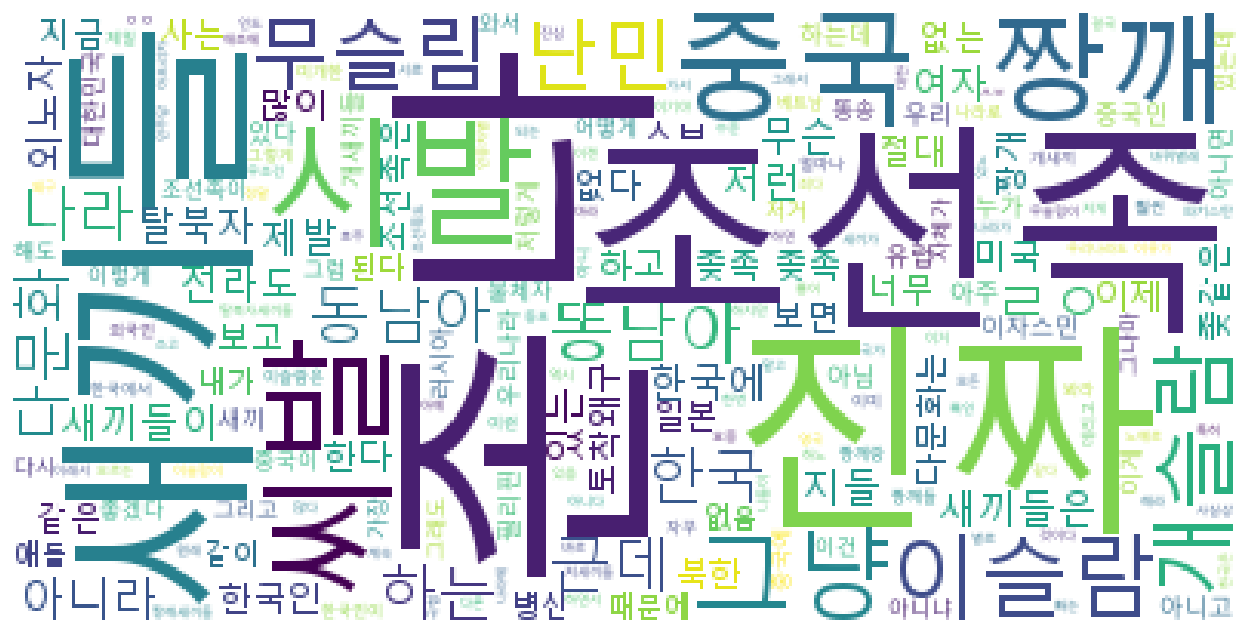

In [30]:
plt.figure(figsize = (20, 8))
plt.imshow(result_cloud) # 이미지 그리기
plt.axis("off") # 축 끄기
plt.savefig("./data/word_cloud_clean.png")
plt.show()

### 단어 연관성 분석
- 딥러닝 기반으로 단어간의 연관성(유사도)를 분석하는 모델
- word2vec : 문장에서 인접된 단어(토큰)끼리 서로 관련이 있음을 숫자로 표현해주는 도구

In [31]:
!pip install gensim

In [32]:
from gensim.models import Word2Vec

In [33]:
w2v = Word2Vec(
    window = 3, # 인접된 단어의 영역을 경정하는 수
    min_count = 5, # 학습 단어로 설정하기 위한 최소 등장 횟수
    sg = 1, # skip-gram
    vector_size = 50, # 각 단어를 50개의 숫자로 표현
    sentences = [doc.split(" ") for doc in train['문장']] # 학습시킬 문장
)

##### word2vec의 2가지 방식
1. skip-gram : 중심 단어로 주변 단어를 예측, 속도는 느리지만 성능이 좋음
2. CBOW : 주변 단어로 중심 단어를 예측, 속도가 빠르지만 성능이 떨어짐

- 예시
    - 문장 : "고양이가 쥐를 쫓는다"
    - skip-gram : "고양이"를 보고 "가", "쥐를", "쫓는다"를 예측하려고 하는 방식
    - CBOW : "가", "쥐를", "쫓는다"를 보고 "고양이"를 예측하려고 하는 방식

In [34]:
w2v.wv.most_similar("이슬람")

[('나는', 0.9983816742897034),
 ('한다', 0.9983430504798889),
 ('가장', 0.9983025193214417),
 ('사는', 0.9980400800704956),
 ('지들', 0.9980069398880005),
 ('하나', 0.9980064034461975),
 ('진정한', 0.9978618621826172),
 ('되면', 0.9978607892990112),
 ('한번', 0.9978474974632263),
 ('보니까', 0.9978420734405518)]

### 감정 분석
- 혐오 표현 : 0, 악플&욕설 : 1, clean : 2

In [35]:
train.columns

Index(['문장', '여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오',
       '악플/욕설', 'clean', '개인지칭'],
      dtype='object')

In [36]:
# 혐오 표현 컬럼 추가
train["혐오표현"] = train.loc[:,"여성/가족":"기타 혐오"].sum(axis =1)

In [37]:
train.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,혐오표현
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0,1


In [38]:
train2 = train[["문장","악플/욕설","clean","혐오표현"]]

In [39]:
train2

,문장,악플/욕설,clean,혐오표현
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,0,0,1
...,...,...,...,...
15000,께롱께롱께롱!!!,0,1,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,1
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,0,0,2
15003,링크도 안박고 가서 글 쓰자고 선동하네,1,0,0


In [40]:
# 정답 라벨링을 위한 사용자 정의함수
def labeling(row) : 
    if row["혐오표현"] > 0 : # 넘어오는 행들에 대해 "혐오표현" 인덱싱을 수행한 후 0 초과인지 확인(1이상인가?)
        return 0
    elif row["악플/욕설"] > 0 :
        return 1
    else : 
        return 2

In [41]:
y_train = train2.apply(labeling, axis = 1)
# axis = 1 -> 매개변수에 행 단위로 인자가 전달됨

In [42]:
# 테스트 셋도 맞춰주기
test["혐오표현"] = test.loc[:,"여성/가족":"기타 혐오"].sum(axis = 1)
test2 = test[["문장", "혐오표현", "악플/욕설", "clean"]]
y_test = test2.apply(labeling, axis = 1)

In [43]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
3732    0
3733    1
3734    0
3735    0
3736    0
Length: 3737, dtype: int64

In [44]:
train2

,문장,악플/욕설,clean,혐오표현
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,0,0,1
...,...,...,...,...
15000,께롱께롱께롱!!!,0,1,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,1
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,0,0,2
15003,링크도 안박고 가서 글 쓰자고 선동하네,1,0,0


#### 감정분석 순서
1. 문제정의
2. 데이터 수집
3. 전처리
4. 토큰화
5. 수치화
6. 학습
7. 예측
8. 평가 -> ex. 정답데이터(악플/욕설, clean, 혐오표현)에 대해 가중치가 높은 단어들을 추출해서 시각화 등

In [45]:
!pip install konlpy

In [53]:
from konlpy.tag import Okt, Kkma
# 성능 비교 : kkma(꼬꼬마) > Komoran > Okt > hannanum ※ 성능이 좋으면 좋을 수록 처리하는 시간이 증가!

In [54]:
# 형태소 분석기 객체 생성
okt = Okt()

In [55]:
okt.morphs("아버지가 방에 들어가신다")

['아버지', '가', '방', '에', '들어가신다']

In [56]:
# 품사 태깅(pos tagging)
okt.pos("아버지가 방에 들어가신다")

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]

In [57]:
# 명사만 추출
okt.nouns("아버지가 방에 들어가신다")

['아버지', '방']

In [58]:
# 형태소 분석기 태그셋 확인
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [59]:
# 꼬꼬마 형태소 분석기 생성
kkma = Kkma()

In [60]:
kkma.nouns("아버지가 방에 들어가신다")

['아버지', '방']

In [61]:
kkma.morphs("아버지가 방에 들어가신다")

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다']

In [62]:
kkma.pos("아버지가 방에 들어가신다")

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [63]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [64]:
okt_cnt = len(list(okt.tagset.keys()))
kkma_cnt = len(list(kkma.tagset.keys()))

In [65]:
# Okt랑 Kkma 기준 개수 비교
print(f"Okt의 품사 기준 개수 : {okt_cnt}")
print(f"Kkma의 품사 기준 개수 : {kkma_cnt}")

Okt의 품사 기준 개수 : 19
Kkma의 품사 기준 개수 : 67


In [66]:
from tqdm import tqdm as tq # 반복작업을 시각화 해주는 도구

In [67]:
train_morphs = [] # 훈련용 리스트
for txt in tq(text_train) : # 훈련용 text(문장)을 반복
    morphs = okt.morphs(txt) # 각 문장들을 형태소 단위로 ㅜㄴ리
    train_morphs.append(morphs)

100%|███████████████████████████████████████████████████████████████████████████| 15005/15005 [00:27<00:00, 540.05it/s]


In [68]:
text_test = test["문장"]

In [69]:
text_test

0       ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...
1                              여자들은 취미가 애낳는건가.. 취미를 좀 가져라
2                                개슬람녀 다 필요없고 니 엄마만 있으면 된다
3       조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...
4                                   바지 내리다 한남들 와꾸 보고 올려뿟노
                              ...                        
3732                          저게 시대적언어면 한남충도 시대적언어 아니노 ㅋㅋ
3733                             다른것보다 눈이 어떻게 저렇게 생기노.탄식.
3734               막노동을 해도 한국에살고말지 미쳤다고 남미를가냐?차라리 자살을하겠다.
3735    ‘사형을 구형하였으나 여성인 점을 감안해 25년 선고’ ???내가 뭐 잘못본건가?개...
3736                              참군남이노 남자의 용도는 고기방패다 ㅋㅋㅋ
Name: 문장, Length: 3737, dtype: object

In [70]:
test_morphs = []
for txt in tq(text_test) : 
    test_morphs.append(okt.morphs(txt))

100%|█████████████████████████████████████████████████████████████████████████████| 3737/3737 [00:06<00:00, 613.65it/s]


In [71]:
# 클렌징
# 글자가 하나인 토큰과 정규표현식 패턴에 걸리는 불필요한 토큰 삭제

# 정규표현식 패턴 만들기
p = re.compile("[ㅋㅎㄷ~ㅡ>!?.,0-9a-zA-Z]+") # 정규표현식 패턴

In [72]:
clean_text_train = [] # 클렌징 된 결과가 들어갈 리스트

for s in tq(train_morphs) : # 한 문장(1D list)씩 s라는 변수로 들여다보기!
    tmp = [] # 하나의 문장이 검사를 수행한 이후, 정제된 형태소들만 담아줄 리스트!
    for token in s : # 하나의 형태소씩 token이라는 변수로 들여다보기!
        if len(token) < 2 : # token 길이가 2미만인가?
            continue
        elif p.match(token) : # 정규 표현식에 매칭되는 token인가?
            continue
        tmp.append(token) # 정제 된 토큰들을 다시 하나의 문장으로 만들어주기
    clean_text_train.append(tmp) # 정제가 끝난 문장들을 하나씩 쌓아주기

100%|████████████████████████████████████████████████████████████████████████| 15005/15005 [00:00<00:00, 173011.51it/s]


In [73]:
clean_text_train

[['일안하는', '시간', '쉬고싶어서', '그런게', '아닐까'],
 ['아동',
  '성범죄',
  '페도버',
  '기록',
  '끊어져',
  '영원히',
  '고통',
  '받는다',
  '무슬림',
  '이다',
  '까지',
  '떨어지고',
  '출산',
  '위험'],
 ['루나',
  '솔로',
  '앨범',
  '나왔을',
  '부터',
  '머모',
  '기운',
  '있었음',
  'ㅇㅇ',
  '진짜',
  '띵곡임',
  '들어',
  '보셈'],
 ['홍팍',
  '에도',
  '어버이연합',
  '인가',
  '보내요',
  '이런',
  '뎃글',
  '있는데',
  '어버이연합',
  '신고',
  '하면',
  '에서',
  '고소',
  '가능하냐'],
 ['여기',
  '여자',
  '김치',
  '라고',
  '먼저',
  '불렸다',
  '여자',
  '심하게',
  '그런다',
  '이렇게',
  '싸우냐',
  '둘다',
  '나쁜',
  '이상',
  '이하',
  '아닌데'],
 ['향가',
  '피방',
  '가면',
  '동네',
  '부럴',
  '친구',
  '이랑은',
  '거르',
  '없이',
  '이야기',
  '하니까',
  '하게',
  '되더라',
  '당연히',
  '보드',
  '치거나',
  '그러지는',
  '않는데',
  '하는게',
  '많이',
  '거칠어지긴',
  '반성',
  '해야겠네'],
 ['예수',
  '새끼',
  '개새끼',
  '창녀',
  '아들',
  '애비',
  '실종',
  '가정교육',
  '받은',
  '무뇌충',
  '허언증',
  '정신병',
  '사기꾼',
  '망상',
  '근본',
  '없는',
  '병신',
  '장애인',
  '짱개',
  '흑인',
  '이슬람',
  '전라도'],
 ['나이', '먹고', '피시방', '가는', '대가리', '만찬', '들임'],
 ['출산',
  '같은',
  '소리',
  '하네',
  '우리나라

In [74]:
clean_text_test = []

for s in tq(test_morphs) : 
    tmp = []
    for token in s :
        if len(token) < 2 : 
            continue
        elif p.match(token) :
            continue
        tmp.append(token)
    clean_text_test.append(tmp)

100%|██████████████████████████████████████████████████████████████████████████| 3737/3737 [00:00<00:00, 147040.86it/s]


### 수치화
- BOW(Bag of words), TF-IDF 등
- BOW : 문장에서 특정 단어의 등장 빈도수를 수치화하는 방법
- 단점
    - 문장에서 단어의 순서를 고려하지 않음 -> 문맥의 의미를 컴퓨터가 이해하기 힘듬
    - 문서들에 대한 단어사전 구축 시, 토큰 개수 별로 단어사전의 크기가 결정됨
    - -> 매우 많은 X(문제데이터)를 만들게 됨 -> 차원이 높다 -> 모델의 복잡도가 올라간다! -> 과적합 걸리기 쉬움

In [75]:
from sklearn.feature_extraction.text import CountVectorizer # BOW 도구 불러오기

In [76]:
sample = ["나는 어제 점심에 햄버거를 먹었다.",
          "나는 오늘 저녁에 운동하러 갈꺼야",
          "너 저녁에 운동하러 갈꺼야?",
          "좋겠다..나는 저녁에 공부해야 돼."]

In [77]:
sample_cv = CountVectorizer() # Bow 객체 생성

In [78]:
sample_cv.fit(sample) # 단어사전 구축

CountVectorizer()

In [79]:
sample_cv.vocabulary_ # 단어사전 확인
# 주의 : value에 들어있는 값들은 전부 인덱스!

{'나는': 2,
 '어제': 4,
 '점심에': 8,
 '햄버거를': 10,
 '먹었다': 3,
 '오늘': 5,
 '저녁에': 7,
 '운동하러': 6,
 '갈꺼야': 0,
 '좋겠다': 9,
 '공부해야': 1}

In [80]:
# 단어사전을 기반으로 수치화(벡터화)
result = sample_cv.transform(sample) # 빈도 기반으로 수치화

In [81]:
sample

['나는 어제 점심에 햄버거를 먹었다.',
 '나는 오늘 저녁에 운동하러 갈꺼야',
 '너 저녁에 운동하러 갈꺼야?',
 '좋겠다..나는 저녁에 공부해야 돼.']

In [82]:
result_arr = result.toarray() # ndarray 형태로 변환!

In [83]:
# 단어사전 DataFrame 만들기! -> 각 컬럼에 매핑하기 위해!
key_list = []
value_list = []
for key, value in sample_cv.vocabulary_.items() : # 단어사전의 인덱스별 정렬을 위해 list로 담아둔 후 Series로 형변환
    key_list.append(key)
    value_list.append(value)

In [84]:
key_list, value_list

(['나는', '어제', '점심에', '햄버거를', '먹었다', '오늘', '저녁에', '운동하러', '갈꺼야', '좋겠다', '공부해야'],
 [2, 4, 8, 10, 3, 5, 7, 6, 0, 9, 1])

In [85]:
columns = pd.Series(key_list, index=value_list).sort_index() 
# columns 순서를 고려하여 index에 index 기준으로 정렬 후 컬럼명(단어 사전) 사용

In [86]:
sample

['나는 어제 점심에 햄버거를 먹었다.',
 '나는 오늘 저녁에 운동하러 갈꺼야',
 '너 저녁에 운동하러 갈꺼야?',
 '좋겠다..나는 저녁에 공부해야 돼.']

In [87]:
pd.DataFrame(result_arr, columns=columns) # DataFrame으로 확인
# 각 컬럼(단어사전)별로 단어가 카운팅돼서 문장이 수치화 된 것을 확인!

,갈꺼야,공부해야,나는,먹었다,어제,오늘,운동하러,저녁에,점심에,좋겠다,햄버거를
0,0,0,1,1,1,0,0,0,1,0,1
1,1,0,1,0,0,1,1,1,0,0,0
2,1,0,0,0,0,0,1,1,0,0,0
3,0,1,1,0,0,0,0,1,0,1,0


In [88]:
# 실제 실습 데이터에 적용해보자!!
unsmile_cv = CountVectorizer(
    max_df = 5, # 최대 등장 빈도
    min_df = 2, # 최소 등장 빈도
    ngram_range = (1, 2), # 1gram, 2gram도 단어사전으로 채택
    stop_words = ["으로", "이다", "하고", "부터"] # 불용어 등록 -> 단어사전에 채택되지 않음!
)

In [89]:
clean_text_train2 = [] # 1D 리스트로 만들어주기 위한 리스트 초기화
clean_text_test2 = []

# 형태소 단위로 쪼개진 데이터(2D)를 띄어쓰기를 이용해 문장(1D)으로 묶어줌
for txt in clean_text_train : 
    clean_text_train2.append(" ".join(txt))
    
for txt in clean_text_test : 
    clean_text_test2.append(" ".join(txt))

In [90]:
# 단어사전 구축
unsmile_cv.fit(clean_text_train2 + clean_text_test2)
# train set으로만 단어사전을 만든다면, train set에만 있던 token들로만 단어사전이 구축됨
# test set도 반영하기 위해 합쳐서 단어사전 구축!

CountVectorizer(max_df=5, min_df=2, ngram_range=(1, 2),
                stop_words=['으로', '이다', '하고', '부터'])

In [91]:
# 단어사전 확인
len(unsmile_cv.vocabulary_)

17212

In [92]:
# 수치화
trans_X_train = unsmile_cv.transform(clean_text_train2)
trans_X_test = unsmile_cv.transform(clean_text_test2)

In [93]:
trans_X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 모델링

In [94]:
from sklearn.linear_model import LogisticRegression # 선형 분류 모델
from sklearn.model_selection import cross_val_score # 검증 도구

In [95]:
lr_clf = LogisticRegression(max_iter = 10000)
cross_val_score(lr_clf, trans_X_train, y_train, cv = 5).mean()

0.5210929690103299

In [96]:
# 하이퍼 파라미터 튜닝
# CounterVectorizer와 LogisticRegression 모델을 튜닝
# 두 개를 묶어서 튜닝하도록 파이프라인 구성
# 파이프라인 : 두 개 이상의 기능을 하나로 묶는 것!
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [97]:
unsmile_pipe = Pipeline([
    ("unsmile_cv", CountVectorizer(stop_words = ["으로","이다","하고","부터"])), 
    ("unsmile_logi", LogisticRegression())
])

In [101]:
# 하이퍼 파라미터 경우의 수 설정
params = {
    "unsmile_cv__max_df":[0.9, 0.85, 0.8],
    "unsmile_cv__min_df":[3, 5, 7, 10],
    "unsmile_cv__ngram_range":[(1, 1),(1, 2),(1, 3)],
    "unsmile_logi__C":[10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}

In [104]:
# 그리드 서치 옵션 설정
grid = GridSearchCV(unsmile_pipe, params, cv = 3, n_jobs=-1)

In [105]:
grid.fit(clean_text_train2, y_train) # 최적의 하이퍼 파라미터 찾기!

C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_cv',
                                        CountVectorizer(stop_words=['으로', '이다',
                                                                    '하고',
                                                                    '부터'])),
                                       ('unsmile_logi', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'unsmile_cv__max_df': [0.9, 0.85, 0.8],
                         'unsmile_cv__min_df': [3, 5, 7, 10],
                         'unsmile_cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'unsmile_logi__C': [10000, 1000, 100, 10, 1, 0.1, 0.01,
                                             0.001, 0.0001]})

In [106]:
# best params 조합
grid.best_params_

{'unsmile_cv__max_df': 0.9,
 'unsmile_cv__min_df': 3,
 'unsmile_cv__ngram_range': (1, 1),
 'unsmile_logi__C': 1}

In [107]:
grid.best_score_

0.6887038692488078

In [109]:
# 최적의 하이퍼파라미터 조합으로 구성된 모델 꺼내오기!
best_model = grid.best_estimator_

In [111]:
# 평가
best_model.score(clean_text_test2, y_test)

0.7077869949157077

In [112]:
# 분류평가지표 리포팅
from sklearn.metrics import classification_report # 전반적인 분류 평가지표를 확인할 수 있는 도구

In [113]:
y_pred = best_model.predict(clean_text_test2)

In [118]:
print(classification_report(y_test, y_pred))
# precision(정밀도) : 각각의 클래스들에 대해 얼마나 정밀하게 잘 맞추는가?
# recall(재현율) : 각각의 클래스들에 대해 양성으로 얼마나 잘 걸러내는가?
# f1-score : 정밀도와 재현율의 균형을 고려한 값
# support : 각 클래스별 샘플 개수

# accuracy(정확도) : 전체 샘플중에서 맞춘 개수의 비율
# macro avg(매크로 평균) : 각 클래스 별 개수를 무시하고 단순 평균을 계산한 값
# weighted avg(가중 평균) : 각 클래스 샘플 수를 고려한 가중 평균을 계산한 값

# acc가 71%로 전체적인 예측 성능은 좋다에 가깝지만, 각 클래스별 성능 편차가 매우 큼!

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2016
           1       0.56      0.45      0.50       786
           2       0.57      0.69      0.63       935

    accuracy                           0.71      3737
   macro avg       0.65      0.65      0.65      3737
weighted avg       0.71      0.71      0.71      3737



In [119]:
# 0 : 혐오표현, 1 : 악플/욕설, 2 : clean
y_train.value_counts()

0    8121
2    3741
1    3143
dtype: int64

### 모델 저장 및 로드

In [120]:
import pickle # 파이썬에 존재하는 모든 자료형을 파일로 저장

In [122]:
# 모델 저장
with open("./data/best_model.pkl", 'wb') as f : # 쓰기모드로 파일 스트림 오픈
    pickle.dump(best_model, f) # 해당 모델을 객체에 저장 후 지정된 경로로 저장

In [123]:
# 모델 로딩
with open("./data/best_model.pkl", 'rb') as f : # 읽기모드로 파일 스트림 오픈
    my_best_model = pickle.load(f) # 모델 객체를 로딩

In [125]:
my_best_model.predict(clean_text_test2) # 저장하고 꺼내오면 전에 학습된 모델을 꺼내쓸 수 있음!

array([0, 2, 2, ..., 2, 0, 0], dtype=int64)

### 학습 결과 시각화 및 분석

In [126]:
# 3가지 클래스 중에 제일 성능이 괜찮은 카테고리의 가중치를 시각화하여,
# 어떠한 token(단어)이 영향을 많이 줬는지 시각화

In [129]:
unsmile_cv = my_best_model.steps[0][1] # CountVectorizer 객체 인덱싱
unsmile_logi = my_best_model.steps[1][1] # LogisticRegression 객체 인덱싱

In [131]:
# 단어 사전 추출
voca = unsmile_cv.vocabulary_

In [133]:
# 가중치 추출
weight = unsmile_logi.coef_[0] # 0 : 혐오표현 클래스의 가중치에 대한 인덱싱

In [138]:
unsmile_df = pd.DataFrame([voca.keys(), voca.values()]).T # 단어사전의 키값(token)과 벨류값(컬럼번호)를 통해 DF화
unsmile_df.columns = ["단어", "인덱스"] # 컬럼명 부여
unsmile_df.sort_values(by = "인덱스", inplace = True) # 인덱스를 기준으로 정렬 -> 가중치(weight)는 오름차순으로 정렬되어 있기 때문!

In [140]:
unsmile_df.set_index("인덱스", inplace = True) # 특정 컬럼을 인덱스로 지정
unsmile_df["가중치"] = weight

In [143]:
unsmile_df.sort_values(by = "가중치", ascending = False, inplace = True) # 가중치를 기준으로 정렬(차트에선 정렬이 안되니!)

In [145]:
# bar chart로 시각화
plt.rcParams['font.family'] = "Malgun Gothic" # 한글이 지원되는 폰트로 설정

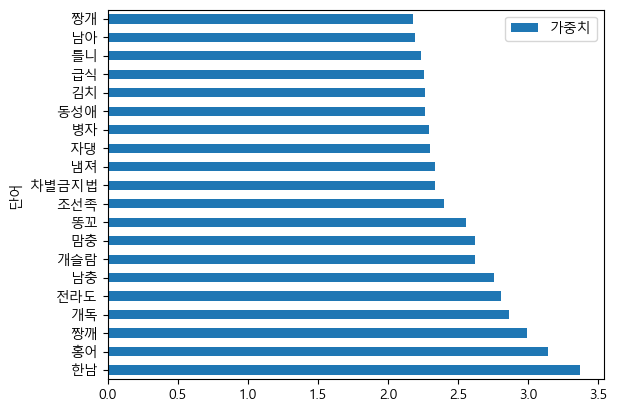

In [147]:
unsmile_df.head(20).set_index("단어").plot(kind = "barh")
plt.show()